In [2]:
import regex as re
genomefile = '/home/tsomakiank/nikolaou_assignments/e_coli_genome.fa'
window = 1000
f=open(genomefile, 'r')

seq = ""
nG = nC = 0
total = 0
window = int(window)

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        total=total+length
        seq=seq+line[0:length-1]
f.close()


In [3]:
def kmer_seq_sign(seq,k):
    pnuc = {} #A dictionary that will hold the nucleotide frequncies in the window sequence
    pnuc['A'] = float(seq.count('A')/len(seq))
    pnuc['C'] = float(seq.count('C')/len(seq))
    pnuc['G'] = float(seq.count('G')/len(seq))
    pnuc['T'] = float(seq.count('T')/len(seq))

    kmertable = {}
    for i in range(len(seq)-k):
        DNA=seq[i:i+k]
        if DNA not in kmertable.keys():
            kmertable[DNA]=1
        else:
            kmertable[DNA]+=1

    kmertable = {k: float(v) / len(seq) for k, v in kmertable.items()}

    rkmertable = kmertable
    pkmer = 1
    for kmer in kmertable.keys():
        for j in range(len(kmer)):
            nuc = list(kmer)[j]
            pkmer = pkmer * pnuc[nuc]
        rkmertable[kmer]=round(kmertable[kmer]/(pkmer),3)
        kmer_signature = list(sorted(rkmertable.items()))
        kmer_signature = [x[1] for x in kmer_signature]
        return kmer_signature


In [5]:
kmer_seq_sign('ATGACACGATGACGATGACGATACGA', k = 2)

[0.19230769230769232,
 2.6,
 0.038461538461538464,
 0.15384615384615385,
 0.23076923076923078,
 0.038461538461538464,
 0.11538461538461539]

In [ ]:
def read_genome(genomefile):
    import regex as re
    f=open(genomefile, 'r')

    seq = ""

    total = 0

    for line in f:
        x=re.match(">", line)
        if x == None:
            length=len(line)
            total=total+length
            seq=seq+line[0:length-1]
    f.close()
    return seq


In [ ]:



file_dic = {'ecoli' : read_genome('./algorithms/bacterial_genomes/e_coli.fa'),
            'streptococcus' : read_genome('./algorithms/bacterial_genomes/streptococcus_pneumoniae.fa'),
            'bacilus' : read_genome('./algorithms/bacterial_genomes/bacillus_subtilis.fa')}





In [ ]:
signatures = {k : kmer_seq_sign(v,2) for k, v in file_dic.items()}


In [ ]:
signatures

/tmp/ipykernel_37424/2237010064.py:16: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


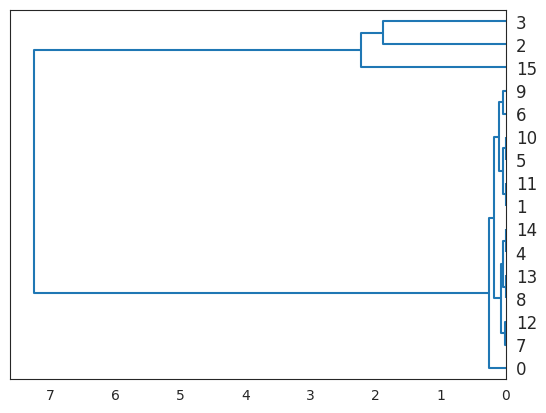

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


combined_array = np.vstack((signatures['ecoli'],signatures['streptococcus'] , signatures['bacilus'])).T
pairwise_dist = pdist(combined_array, metric='euclidean')
# Convert the pairwise distances into a square distance matrix

distance_matrix = squareform(pairwise_dist)

# Calculate the linkage matrix using Ward's method
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
sns.set_style('white')
dendrogram(linkage_matrix, color_threshold=0, orientation='left')

# Show the plot
plt.show()